<a href="https://colab.research.google.com/github/nitrogenlab/gp15wmascripts/blob/main/notebooks/Residuals_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot 
!pip install gsw
import gsw
!pip install xlrd

     |████████████████████████████████| 2.4 MB 13.9 MB/s 


In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hF4jA1LZRXk-pSVqkdhkDryADGdq12JB' -O baseresults.csv #updated to reflect 220110 results
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16670ChB4Qwnnup2cMMaMaRRjMlFJL2w2' -O TaliaResults.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=17pecJ2DmIf5iC2ZOGPAcN7BMsWGg0dBC' -O Aug2017_wm_data.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uN2zQ_UirQ0eLTg7KwBXSnrf8hjozXnc' -O GA01Results.xlsx

--2022-02-01 19:13:26--  https://docs.google.com/uc?export=download&id=1hF4jA1LZRXk-pSVqkdhkDryADGdq12JB
Resolving docs.google.com (docs.google.com)... 108.177.127.139, 108.177.127.102, 108.177.127.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.127.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dvnr23s3aa71b44l14hh4cv61v2oiqoe/1643742750000/06203730782251856755/*/1hF4jA1LZRXk-pSVqkdhkDryADGdq12JB?e=download [following]
--2022-02-01 19:13:28--  https://doc-04-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dvnr23s3aa71b44l14hh4cv61v2oiqoe/1643742750000/06203730782251856755/*/1hF4jA1LZRXk-pSVqkdhkDryADGdq12JB?e=download
Resolving doc-04-a4-docs.googleusercontent.com (doc-04-a4-docs.googleusercontent.com)... 142.250.153.132, 2a00:1450:4013:c16::84
Connecting to doc-04-a4-docs.googleusercontent.com (doc-04

In [3]:
gp15_results = pd.read_csv("baseresults.csv")
#headers=0, na_values = -999

In [4]:
gp15_results.columns

Index(['lat', 'lon', 'Depth', 'CTD pressure', 'stnnbr', 'geotrc_ID', 'sigma0',
       'tc', 'practical_salinity', 'CTD temperature', 'conservative_temp',
       'absolute_salinity', 'silicate', 'nitrate', 'phosphate', 'oxygen',
       'conservative_temp_resid', 'absolute_salinity_resid', 'silicate_resid',
       'nitrate_resid', 'phosphate_resid', 'oxygen_resid', 'AABW_frac_total',
       'AAIW_frac_total', 'ENPCW_frac_total', 'ESSW_frac_total',
       'EqIW_frac_total', 'LCDW_frac_total', 'NPIW_frac_total',
       'PDW_frac_total', 'PSUW_frac_total', 'SPCW_frac_total',
       'SPSTSW_frac_total', 'UCDW_frac_total', 'AABW_0_frac', 'AAIW_0_frac',
       'AAIW_1_frac', 'ENPCW_frac', 'ENPCW_0_frac', 'ENPCW_1_frac',
       'ESSW_frac', 'ESSW_0_frac', 'ESSW_1_frac', 'EqIW_0_frac', 'EqIW_1_frac',
       'LCDW_0_frac', 'LCDW_1_frac', 'NPIW_0_frac', 'NPIW_1_frac',
       'NPIW_2_frac', 'PDW_0_frac', 'PDW_1_frac', 'PDW_2_frac', 'PSUW_frac',
       'PSUW_0_frac', 'PSUW_1_frac', 'SPCW_frac', 'SPC

In [5]:
gp15_results.size

66170

In [6]:
gp15_results

,lat,lon,Depth,CTD pressure,stnnbr,geotrc_ID,sigma0,tc,practical_salinity,CTD temperature,conservative_temp,absolute_salinity,silicate,nitrate,phosphate,oxygen,conservative_temp_resid,absolute_salinity_resid,silicate_resid,nitrate_resid,phosphate_resid,oxygen_resid,AABW_frac_total,AAIW_frac_total,ENPCW_frac_total,ESSW_frac_total,EqIW_frac_total,LCDW_frac_total,NPIW_frac_total,PDW_frac_total,PSUW_frac_total,SPCW_frac_total,SPSTSW_frac_total,UCDW_frac_total,AABW_0_frac,AAIW_0_frac,AAIW_1_frac,ENPCW_frac,ENPCW_0_frac,ENPCW_1_frac,ESSW_frac,ESSW_0_frac,ESSW_1_frac,EqIW_0_frac,EqIW_1_frac,LCDW_0_frac,LCDW_1_frac,NPIW_0_frac,NPIW_1_frac,NPIW_2_frac,PDW_0_frac,PDW_1_frac,PDW_2_frac,PSUW_frac,PSUW_0_frac,PSUW_1_frac,SPCW_frac,SPCW_0_frac,SPCW_1_frac,SPSTSW_frac,UCDW_0_frac,phosphate_remin,nitrate_to_phosphate_remin_ratio,oxygen_to_phosphate_remin_ratio,phosphate_to_phosphate_remin_ratio
0,53.6771,-153.7966,1003.810621,1015.3,5.0,12359,27.459132,0,34.4055,2.7320,2.666302,34.590832,149.27,43.71,2.96,19.67,0.019492,0.000967,0.139080,0.594388,1.733351e-01,1.550931,0.000000e+00,0.000003,0.000000e+00,0.000000,0.000001,3.979834e-03,6.161783e-07,0.968432,2.758242e-02,0.000000,0.000000e+00,0.000001,0.000000e+00,0.000001,0.000002,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000001,0.000000,3.979633e-03,2.011581e-07,0.000000,1.511369e-07,4.650414e-07,0.284551,0.683880,6.681720e-07,0.000000e+00,0.010631,0.016952,0.000000,0.000000,0.000000,0.000000e+00,0.000001,0.019541,29.744785,-288.152604,1.0
1,53.6771,-153.7966,805.076861,813.9,5.0,12358,27.371669,0,34.3348,3.0541,3.001474,34.518273,138.93,43.77,2.98,16.99,0.014750,0.000973,0.105628,0.452329,1.464088e-01,1.179240,1.639068e-07,0.000000,7.459793e-06,0.000014,0.000005,2.146334e-03,2.254895e-06,0.961972,3.584516e-02,0.000007,0.000000e+00,0.000000,1.639068e-07,0.000000,0.000000,0.000000e+00,0.000005,2.635281e-06,0.000000,0.000006,0.000008,0.000001,0.000004,2.146334e-03,0.000000e+00,0.000002,1.620002e-07,0.000000e+00,0.467731,0.494241,0.000000e+00,0.000000e+00,0.022612,0.013233,0.000000,0.000006,0.000001,0.000000e+00,0.000000,0.029810,31.547053,-305.612078,1.0
2,53.6771,-153.7966,604.670431,611.0,5.0,12357,27.274788,0,34.2541,3.3742,3.335276,34.435224,127.61,43.79,2.99,15.94,0.009559,0.000704,0.067493,0.287302,1.214320e-01,0.751631,1.727732e-07,0.000000,3.753292e-09,0.000000,0.000000,5.319709e-07,0.000000e+00,0.934428,6.256665e-02,0.000000,0.000000e+00,0.003004,1.727732e-07,0.000000,0.000000,0.000000e+00,0.000000,3.753292e-09,0.000000,0.000000,0.000000,0.000000,0.000000,2.683889e-07,2.635820e-07,0.000000,0.000000e+00,0.000000e+00,0.624368,0.310061,0.000000e+00,0.000000e+00,0.032148,0.030419,0.000000,0.000000,0.000000,0.000000e+00,0.003004,0.047544,30.893518,-299.280953,1.0
3,53.6771,-153.7966,451.642163,456.2,5.0,12356,27.175402,0,34.1670,3.6594,3.631318,34.345817,115.71,43.78,2.99,16.45,0.005853,0.000587,0.042288,0.177551,9.989323e-02,0.466373,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,4.312061e-04,3.440909e-04,0.874195,1.250298e-01,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.312061e-04,0.000000e+00,0.000000,0.000000e+00,3.440909e-04,0.725950,0.148245,0.000000e+00,0.000000e+00,0.022049,0.102980,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.067404,31.547170,-305.613208,1.0
4,53.6771,-153.7966,303.349433,306.3,5.0,12355,27.032762,0,34.0219,3.9002,3.883683,34.197259,100.10,44.15,3.01,20.64,0.000715,-0.000036,-0.002026,0.000116,-3.333202e-05,0.001802,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,6.219296e-06,8.782706e-02,0.641857,2.703101e-01,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,6.219296e-06,0.000000e+00,0.000000,0.000000e+00,8.782706e-02,0.552329,0.084283,5.244739e-03,0.000000e+00,0.005509,0.264801,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.155617,31.5

In [7]:
abs

<function abs>

In [8]:
from numpy.core.fromnumeric import mean
params = ["conservative_temp", "absolute_salinity", "silicate", "nitrate", "phosphate", "oxygen"]
ranges = []
for param in params:
  ranges.append(max(gp15_results[param]) - min(gp15_results[param]))
  param_range=max(gp15_results[param]) - min(gp15_results[param])
  print(param,"range:", param_range)

from numpy.ma.extras import average
average
residuals = ["conservative_temp_resid", "absolute_salinity_resid", "silicate_resid", "nitrate_resid", "phosphate_resid", "oxygen_resid"]
resid_averages = []
resid_minima = []
resid_maxima = []
for resid in residuals:
  resid_averages.append(average(abs(gp15_results[resid])))
  resid_minima.append(min(gp15_results[resid]))
  resid_maxima.append(max(gp15_results[resid]))
  #resid_avg = average(gp15_results[resid])
  #print(resid,"average:", resid_avg)

avg_percents=[]
min_percents=[]
max_percents=[]
for i in range(len(ranges)):
  avg_percents.append(resid_averages[i]/ranges[i]*100)
  min_percents.append(resid_minima[i]/ranges[i]*100)
  max_percents.append(resid_maxima[i]/ranges[i]*100)
  #avg_percent = resid_averages[i]/ranges[i]
  #print(residuals[i], "average percent:", avg_percent)
  #min_percent = resid_minima[i]/ranges[i]
  #print(residuals[i], "min percent:", min_percent)
  #max_percent = resid_maxima[i]/ranges[i]
  #print(residuals[i], "max percent:", max_percent)
print("average residual percentage of parameter range:")
print(avg_percents)
print("min residual percentage of parameter range:")
print(min_percents)
print("max residual percentage of parameter range:")
print(max_percents)

conservative_temp range: 27.768279153037607
absolute_salinity range: 5.009686297357987
silicate range: 175.12
nitrate range: 44.97
phosphate range: 3.22
oxygen range: 306.02
average residual percentage of parameter range:
[0.35011540674087666, 0.7308964211998632, 0.6212547312708252, 1.0310983630853694, 0.7516655060912102, 0.39343894001879764]
min residual percentage of parameter range:
[-4.053049888579531, -9.50473169911527, -5.5279571278975235, -20.621718790736246, -22.125122246440633, -7.880656919531582]
max residual percentage of parameter range:
[17.589203968235704, 37.54578414714152, 7.575120978999079, 11.421260482077813, 8.286981371458245, 4.352906521796404]


In [9]:
5/175.12*100

2.855185015989036

#Depth vs. residuals

No handles with labels found to put in legend.


(6000.0, 0.0)

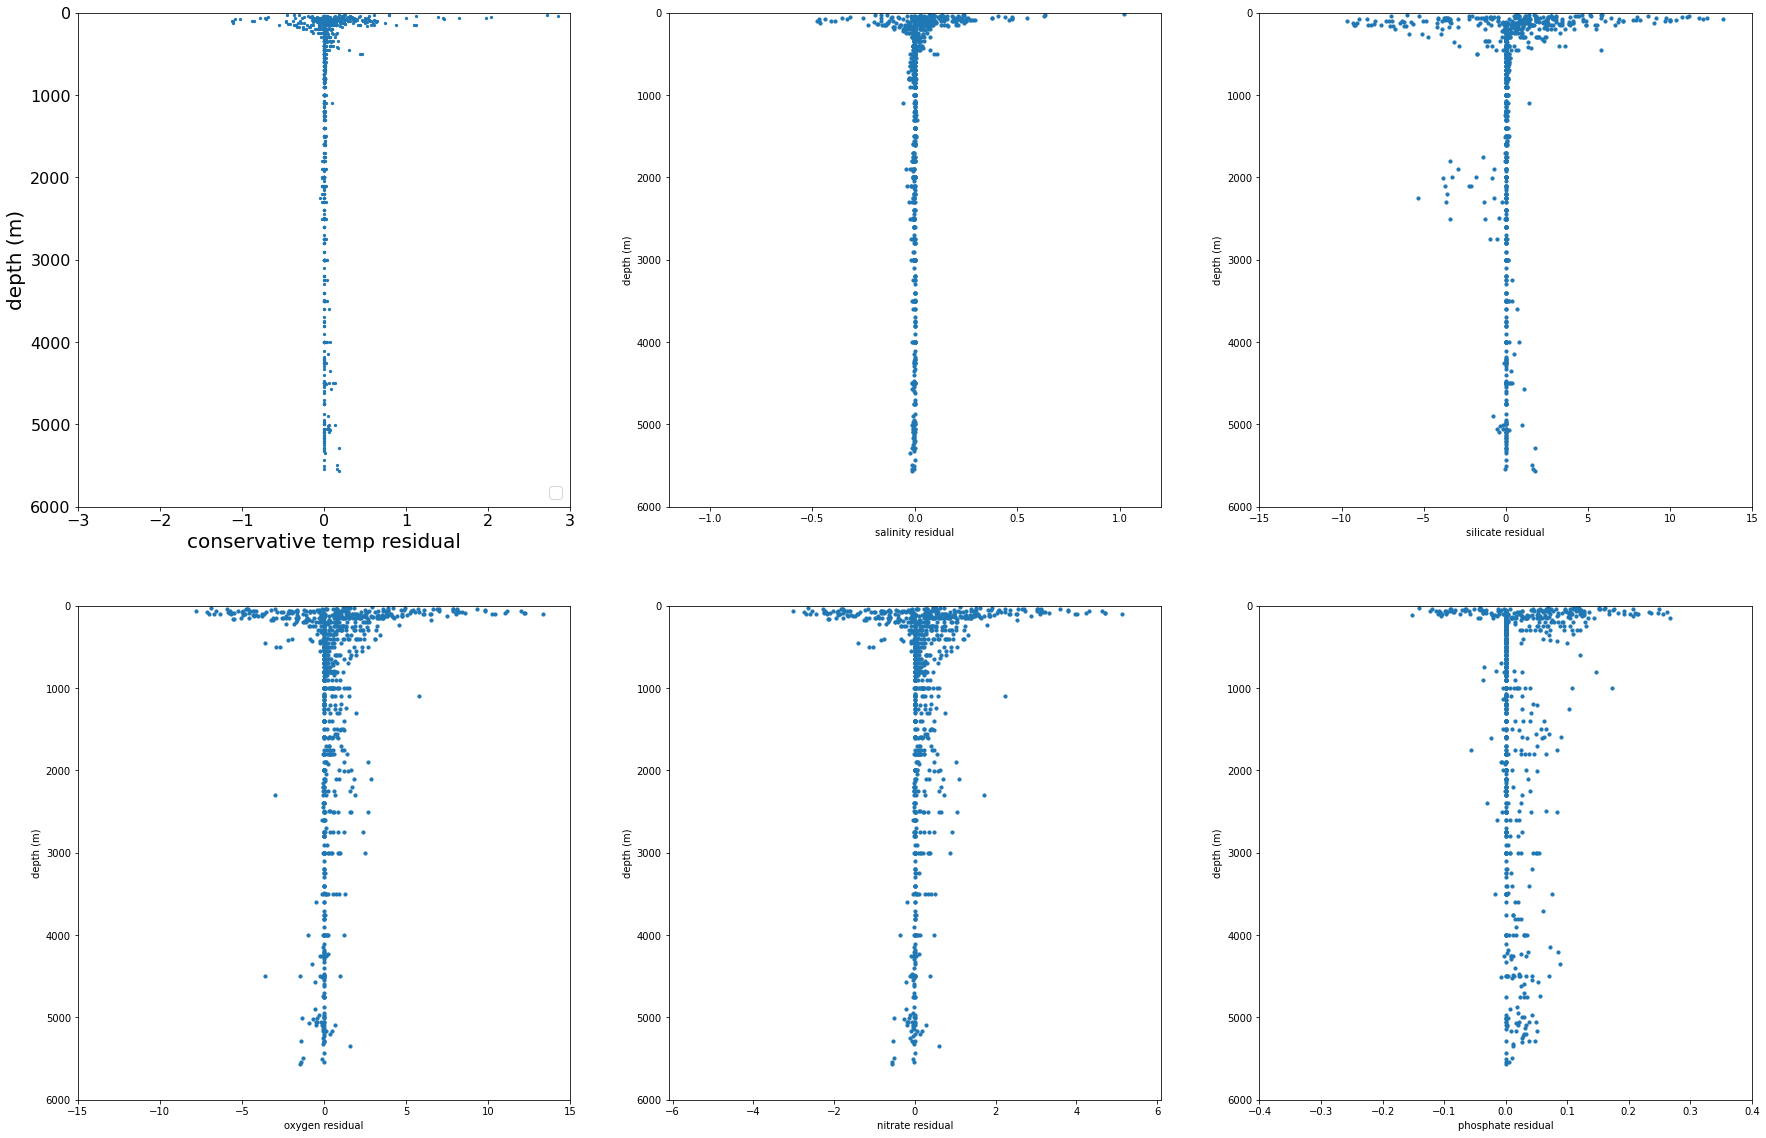

In [10]:
fig = matplotlib.pyplot.figure(figsize=(30.0, 20.0))

axes1 = fig.add_subplot(2, 3, 1)
axes2 = fig.add_subplot(2, 3, 2)
axes3 = fig.add_subplot(2, 3, 3)
axes4 = fig.add_subplot(2, 3, 4)
axes5 = fig.add_subplot(2, 3, 5)
axes6 = fig.add_subplot(2, 3, 6)

#correct depth axis

axes1.set_ylabel('depth (m)', fontsize=20)
axes1.set_xlabel('conservative temp residual', fontsize=20)
axes1.scatter(gp15_results["conservative_temp_resid"], gp15_results["Depth"], s=5)
axes1.set_xlim(-3,3)
axes1.set_ylim(6000,0)
axes1.tick_params(axis='y',labelsize=16)
axes1.tick_params(axis='x',labelsize=16)
axes1.legend(loc=4, fontsize=16)
#axes1.invert_yaxis()

#second plot
axes2.set_ylabel('depth (m)')
axes2.set_xlabel('salinity residual')
axes2.scatter(gp15_results["absolute_salinity_resid"], gp15_results["Depth"], s=10)
axes2.set_xlim(-1.2,1.2)
axes2.set_ylim(6000,0)
#axes2.invert_yaxis()

#Third plot
axes3.set_ylabel('depth (m)')
axes3.set_xlabel('silicate residual')
axes3.scatter(gp15_results["silicate_resid"], gp15_results["Depth"], s=10)
axes3.set_xlim(-15,15)
axes3.set_ylim(6000,0)
#axes3.invert_yaxis()

#fourth plot
axes4.set_ylabel('depth (m)')
axes4.set_xlabel('oxygen residual')
axes4.scatter(gp15_results["oxygen_resid"], gp15_results["Depth"], s=10)
axes4.set_xlim(-15,15)
axes4.set_ylim(6000,0)
#axes4.invert_yaxis()

#fifth plot
axes5.set_ylabel('depth (m)')
axes5.set_xlabel('nitrate residual')
axes5.scatter(gp15_results["nitrate_resid"], gp15_results["Depth"], s=10)
axes5.set_xlim(-6.1, 6.1)
axes5.set_ylim(6000,0)
#axes5.invert_yaxis()

#sixth plot
axes6.set_ylabel('depth (m)')
axes6.set_xlabel('phosphate residual')
axes6.scatter(gp15_results["phosphate_resid"], gp15_results["Depth"], s=10)
axes6.set_xlim(-0.4, 0.4)
axes6.set_ylim(6000,0)
#axes6.invert_yaxis()

# GP15 Histograms

In [11]:
import matplotlib.pyplot as plt

Histograms for paper supplement to show distribution of our residuals

(0.0, 700.0)

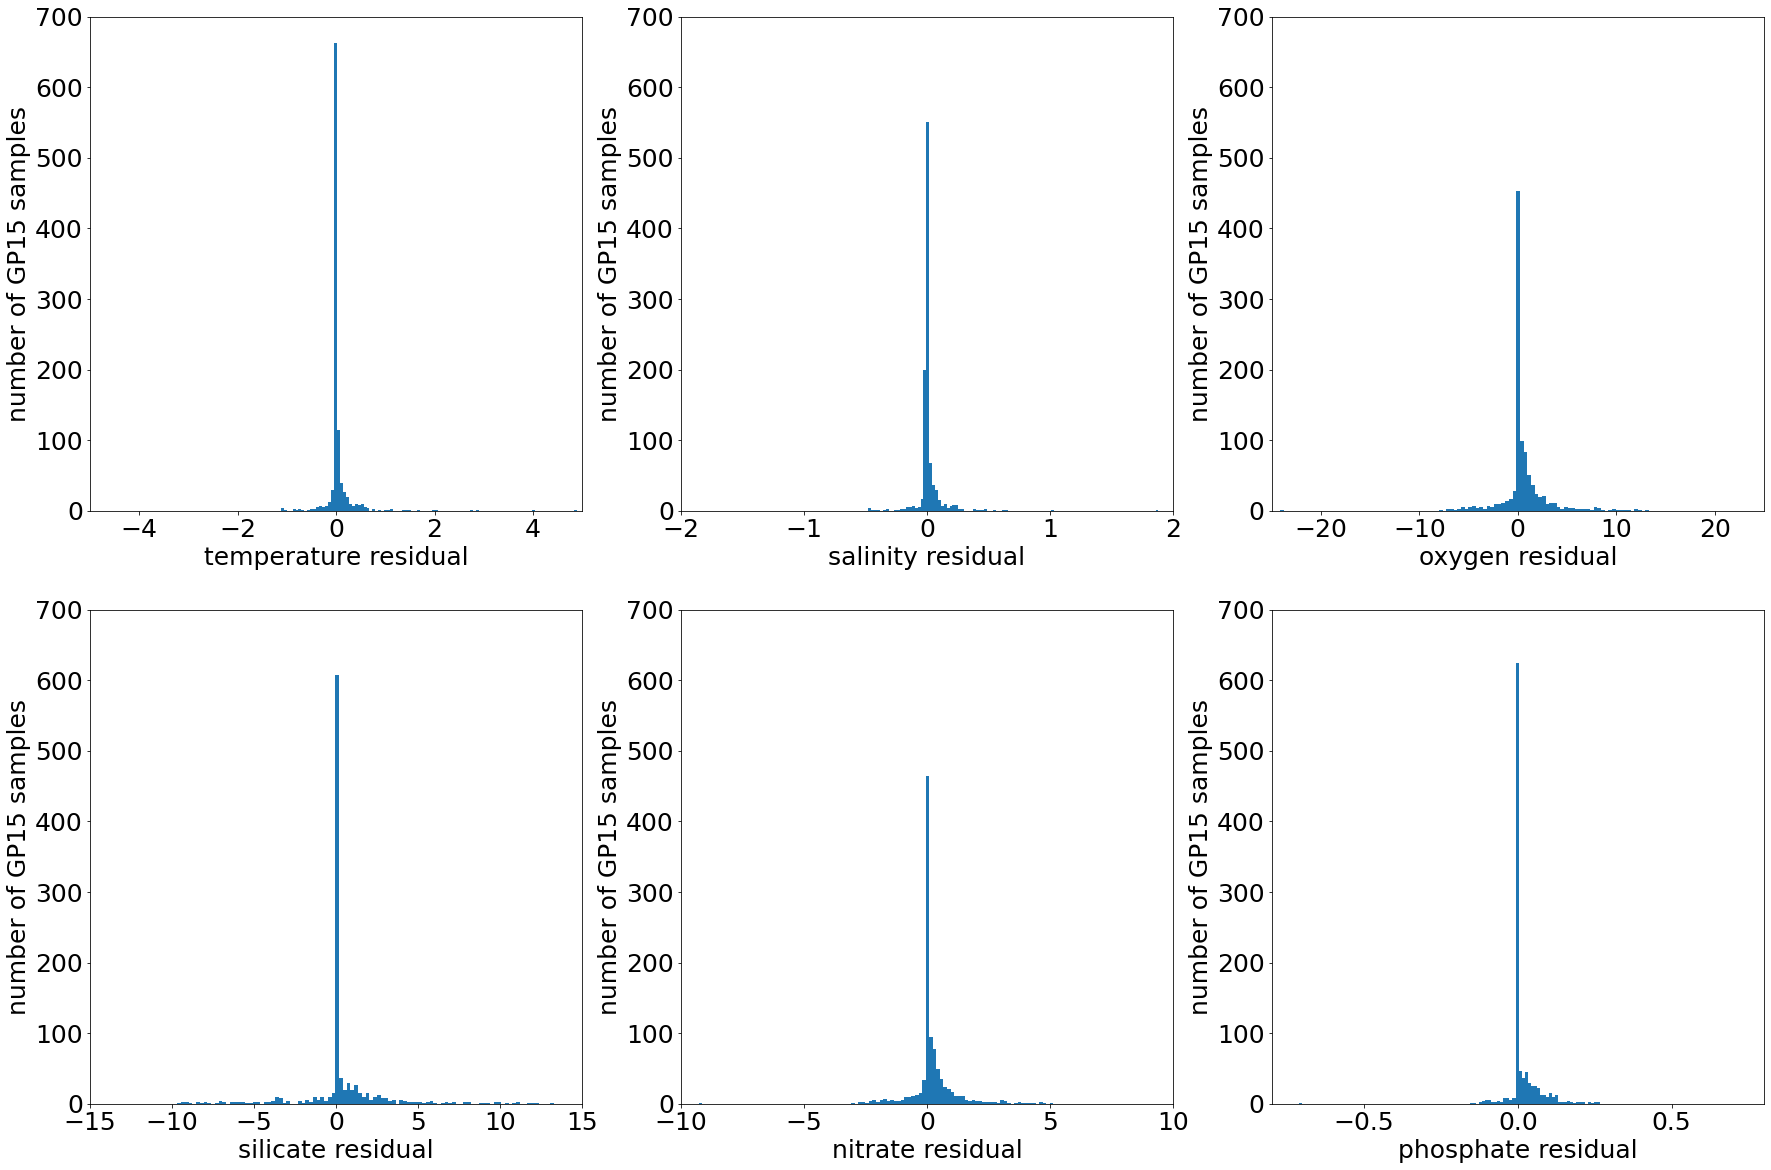

In [45]:
fig1 = matplotlib.pyplot.figure(figsize=(30.0, 20.0))

ax1 = fig1.add_subplot(2, 3, 1)
ax2 = fig1.add_subplot(2, 3, 2)
ax3 = fig1.add_subplot(2, 3, 3)
ax4 = fig1.add_subplot(2, 3, 4)
ax5 = fig1.add_subplot(2, 3, 5)
ax6 = fig1.add_subplot(2, 3, 6)


#conservative temp plot
ax1.set_ylabel('number of GP15 samples', fontsize=25)
ax1.set_xlabel('temperature residual', fontsize=25)
ax1.hist(gp15_results["conservative_temp_resid"], bins=100)
ax1.tick_params(axis='y',labelsize=25)
ax1.tick_params(axis='x',labelsize=25)
ax1.set_xlim(-5, 5)
ax1.set_ylim(0,700)

#sal plot
ax2.set_ylabel('number of GP15 samples', fontsize=25)
ax2.set_xlabel('salinity residual', fontsize=25)
ax2.hist(gp15_results["absolute_salinity_resid"], bins=100)
ax2.tick_params(axis='y',labelsize=25)
ax2.tick_params(axis='x',labelsize=25)
ax2.set_xlim(-2, 2)
ax2.set_ylim(0,700)

#oxy plot
ax3.set_ylabel('number of GP15 samples', fontsize=25)
ax3.set_xlabel('oxygen residual', fontsize=25)
ax3.hist(gp15_results["oxygen_resid"], bins=100)
ax3.tick_params(axis='y',labelsize=25)
ax3.tick_params(axis='x',labelsize=25)
ax3.set_xlim(-25, 25)
ax3.set_ylim(0,700)

#si plot
ax4.set_ylabel('number of GP15 samples', fontsize=25)
ax4.set_xlabel('silicate residual', fontsize=25)
ax4.hist(gp15_results["silicate_resid"], bins=100)
ax4.tick_params(axis='y',labelsize=25)
ax4.tick_params(axis='x',labelsize=25)
ax4.set_xlim(-15, 15)
ax4.set_ylim(0,700)

#nitrate plot
ax5.set_ylabel('number of GP15 samples', fontsize=25)
ax5.set_xlabel('nitrate residual', fontsize=25)
ax5.hist(gp15_results["nitrate_resid"], bins=100)
ax5.tick_params(axis='y',labelsize=25)
ax5.tick_params(axis='x',labelsize=25)
ax5.set_xlim(-10, 10)
ax5.set_ylim(0,700)

#phosphate plot
ax6.set_ylabel('number of GP15 samples', fontsize=25)
ax6.set_xlabel('phosphate residual', fontsize=25)
ax6.hist(gp15_results["phosphate_resid"], bins=100)
ax6.tick_params(axis='y',labelsize=25)
ax6.tick_params(axis='x',labelsize=25)
ax6.set_xlim(-0.8, 0.8)
ax6.set_ylim(0,700)

conservative temp residuals

(-2.0, 2.0)

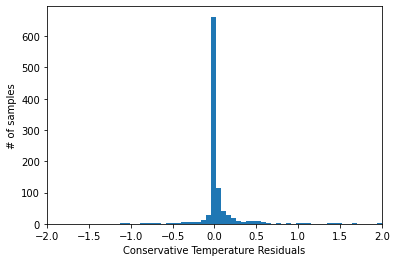

In [12]:
plt.hist(gp15_results['conservative_temp_resid'], bins=100)
plt.xlabel('Conservative Temperature Residuals')
plt.ylabel('# of samples')
plt.xlim(-2, 2)
#plt.title('')

Salinity residuals

(-1.2, 1.2)

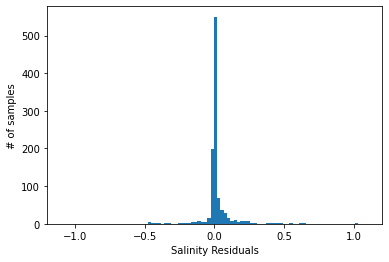

In [13]:
plt.hist(gp15_results['absolute_salinity_resid'], bins=100)
plt.xlabel('Salinity Residuals')
plt.ylabel('# of samples')
plt.xlim(-1.2, 1.2)

Silicate residuals

Text(0, 0.5, '# of samples')

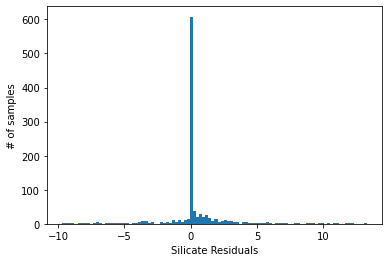

In [14]:
plt.hist(gp15_results['silicate_resid'], bins=100)
plt.xlabel('Silicate Residuals')
plt.ylabel('# of samples')
#plt.xlim(-1.2, 1.2)

Nitrate Residuals

Text(0, 0.5, '# of samples')

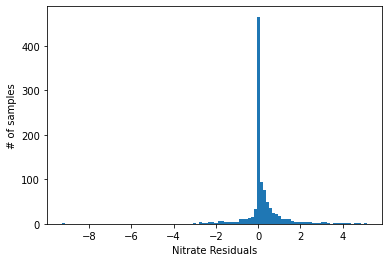

In [15]:
plt.hist(gp15_results['nitrate_resid'], bins=100)
plt.xlabel('Nitrate Residuals')
plt.ylabel('# of samples')
#plt.xlim(-1.2, 1.2)

Phosphate Residuals

Text(0, 0.5, '# of samples')

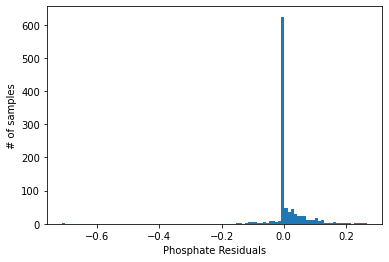

In [16]:
plt.hist(gp15_results['phosphate_resid'], bins=100)
plt.xlabel('Phosphate Residuals')
plt.ylabel('# of samples')
#plt.xlim(-1.2, 1.2)

Oxygen Residuals

Text(0, 0.5, '# of samples')

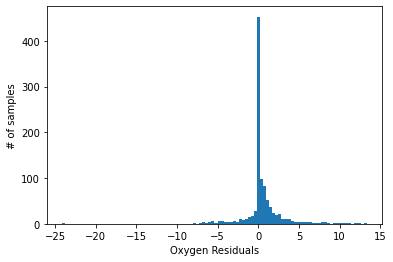

In [17]:
plt.hist(gp15_results['oxygen_resid'], bins=100)
plt.xlabel('Oxygen Residuals')
plt.ylabel('# of samples')
#plt.xlim(-1.2, 1.2)

Zoom in

(-0.1, 0.1)

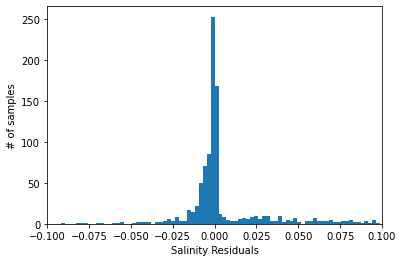

In [18]:
plt.hist(gp15_results['absolute_salinity_resid'], bins=1000)
plt.xlabel('Salinity Residuals')
plt.ylabel('# of samples')
plt.xlim(-0.1, 0.1)

(-0.025, 0.025)

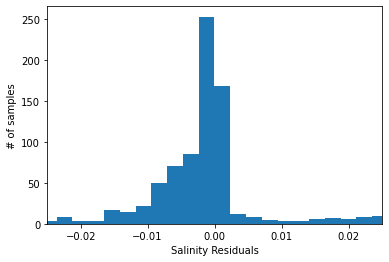

In [19]:
plt.hist(gp15_results['absolute_salinity_resid'], bins=1000)
plt.xlabel('Salinity Residuals')
plt.ylabel('# of samples')
plt.xlim(-0.025, 0.025)

##Peters results GP16

In [20]:
gp16_results = pd.read_csv("Aug2017_wm_data.csv",
                      header=0, na_values = -999)

In [21]:
gp16_results.columns

Index(['sig0 ', 'pt ', 'SP', 'Si', 'depth ', 'mass_cons', 'lat', 'O2', 'NO#',
       'PO4', 'rT', 'rS', 'rSi', 'rNO', 'rPO', 'rmas', 'ESSW', 'ESPIW', 'SPCW',
       'AAIW', 'EqIW', 'UCDW', 'PDW', 'LCDW', 'AABW'],
      dtype='object')

(6000.0, 0.0)

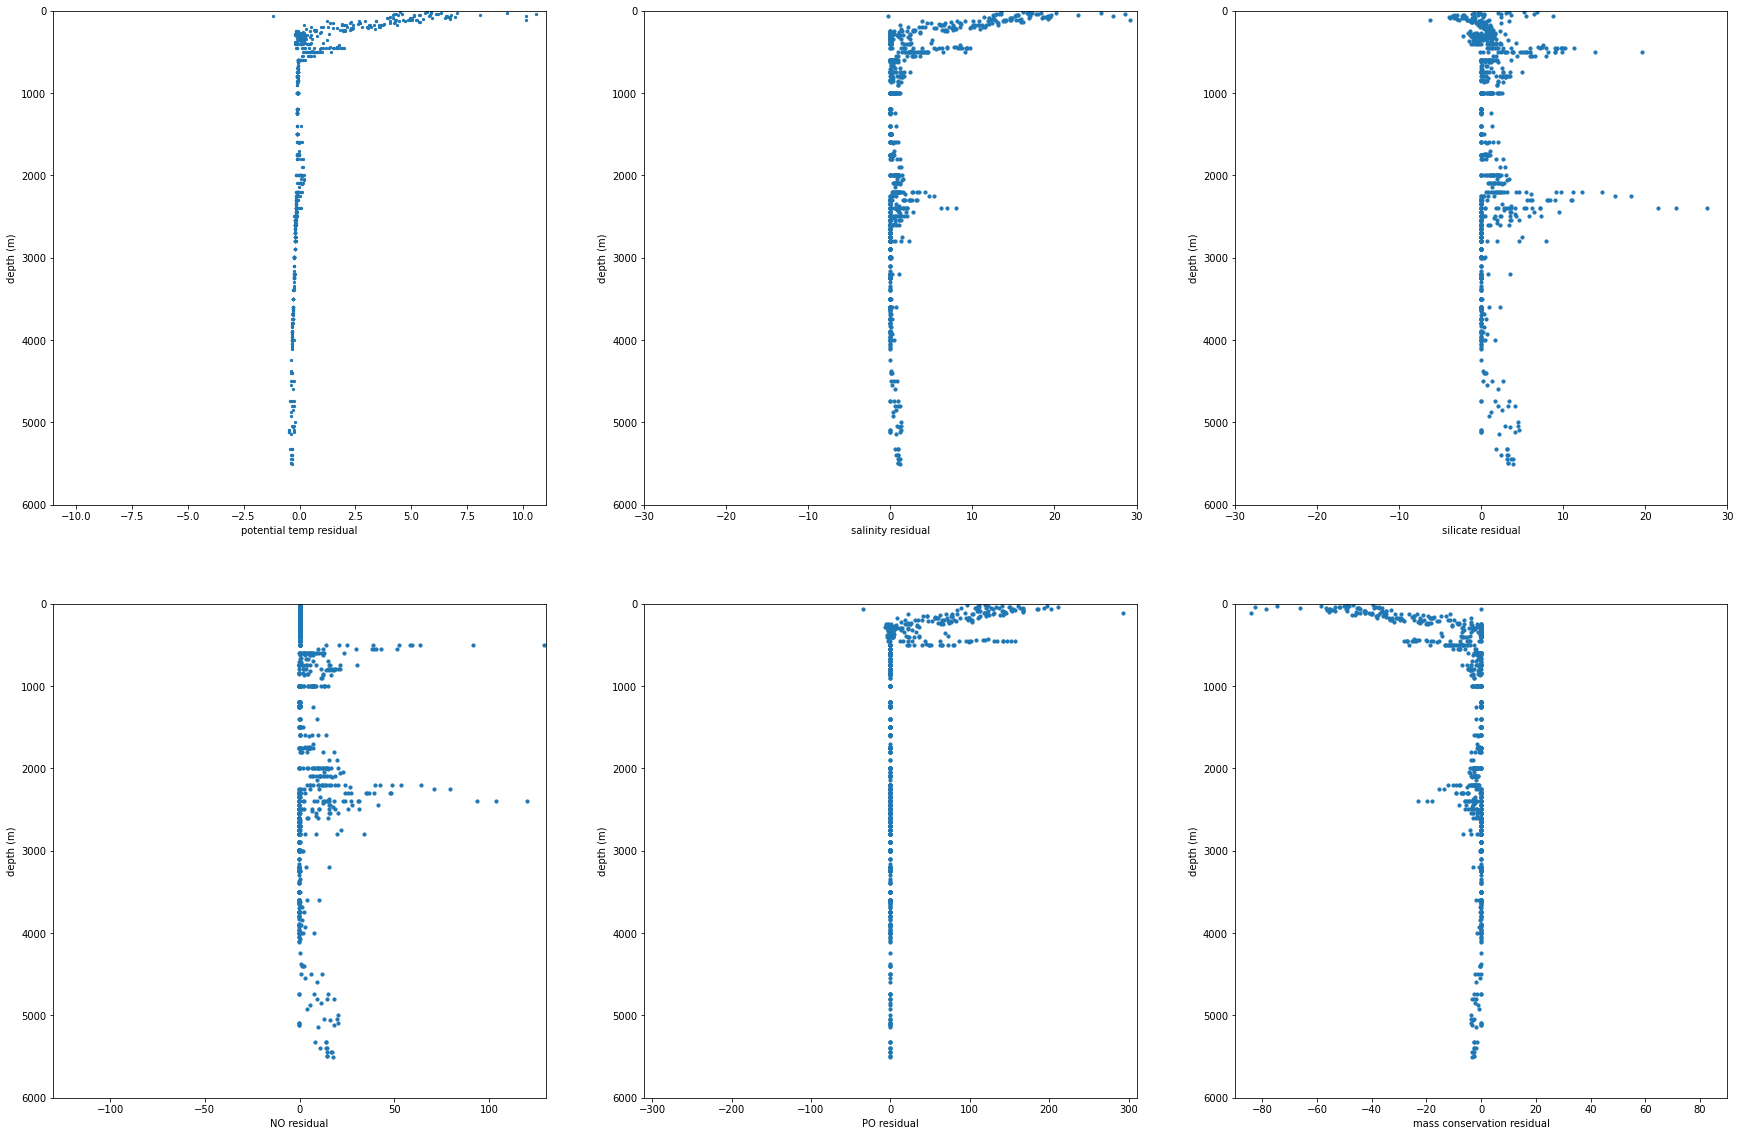

In [22]:
fig = matplotlib.pyplot.figure(figsize=(30.0, 20.0))

axes1 = fig.add_subplot(2, 3, 1)
axes2 = fig.add_subplot(2, 3, 2)
axes3 = fig.add_subplot(2, 3, 3)
axes4 = fig.add_subplot(2, 3, 4)
axes5 = fig.add_subplot(2, 3, 5)
axes6 = fig.add_subplot(2, 3, 6)

#correct depth axis

axes1.set_ylabel('depth (m)')
axes1.set_xlabel('potential temp residual')
axes1.scatter(gp16_results["rT"], gp16_results["depth "], s=5)
axes1.set_xlim(-11,11)
axes1.set_ylim(6000,0)
#axes1.invert_yaxis()

#second plot
axes2.set_ylabel('depth (m)')
axes2.set_xlabel('salinity residual')
axes2.scatter(gp16_results["rS"], gp16_results["depth "], s=10)
axes2.set_xlim(-30,30)
axes2.set_ylim(6000,0)
#axes2.invert_yaxis()

#Third plot
axes3.set_ylabel('depth (m)')
axes3.set_xlabel('silicate residual')
axes3.scatter(gp16_results["rSi"], gp16_results["depth "], s=10)
axes3.set_xlim(-30,30)
axes3.set_ylim(6000,0)
#axes3.invert_yaxis()

#fourth plot
axes4.set_ylabel('depth (m)')
axes4.set_xlabel('NO residual')
axes4.scatter(gp16_results["rNO"], gp16_results["depth "], s=10)
axes4.set_xlim(-130,130)
axes4.set_ylim(6000,0)
#axes4.invert_yaxis()

#fifth plot
axes5.set_ylabel('depth (m)')
axes5.set_xlabel('PO residual')
axes5.scatter(gp16_results["rPO"], gp16_results["depth "], s=10)
axes5.set_xlim(-310, 310)
axes5.set_ylim(6000,0)
#axes5.invert_yaxis()

#sixth plot
axes6.set_ylabel('depth (m)')
axes6.set_xlabel('mass conservation residual')
axes6.scatter(gp16_results["rmas"], gp16_results["depth "], s=10)
axes6.set_xlim(-90, 90)
axes6.set_ylim(6000,0)
#axes6.invert_yaxis()

Evans et al 2020

In [23]:
evans2020 = pd.read_csv("TaliaResults.csv")

In [29]:
evans2020.columns

Index(['lat', 'long', 'pdens', 'pressure', 'nitrate', 'oxygen', 'phosphate',
       'conservative_temp', 'absolute_salinity', 'mass',
       'conservative_temp_resid', 'absolute_salinity_resid', 'oxygen_resid',
       'phosphate_resid', 'mass_resid', '13CW_frac_total', 'NEPIW_frac_total',
       'AAIW_frac_total', '13CW_FK_frac', 'NEPIW_FK_frac', 'AAIW_frac',
       'phosphate_remin', 'oxygen_to_phosphate_remin_ratio',
       'phosphate_to_phosphate_remin_ratio'],
      dtype='object')

In [25]:
z = gsw.z_from_p(p=evans2020['pressure'], lat=evans2020["lat"])
depth = -z #https://github.com/TEOS-10/python-gsw/blob/7d6ebe8114c5d8b4a64268d36100a70e226afaf6/gsw/gibbs/conversions.py#L577
evans2020["depth"] = depth

NotImplementedError: ignored

# GA01 original residuals

In [ ]:
ga01_results = pd.read_excel('GA01Results.xlsx')
print(ga01_results)
ga01_results.columns

In [ ]:
matplotlib.pyplot.scatter(ga01_results['Total_Res'], ga01_results["Depth"], s=5)
#matplotlib.pyplot.title('Scatter plot')
matplotlib.pyplot.xlabel('Total Residual')
matplotlib.pyplot.ylabel('Depth (m)')
matplotlib.pyplot.show()

In [ ]:
fig = matplotlib.pyplot.figure(figsize=(30.0, 20.0))

axes1 = fig.add_subplot(2, 3, 1)
axes2 = fig.add_subplot(2, 3, 2)
axes3 = fig.add_subplot(2, 3, 3)
axes4 = fig.add_subplot(2, 3, 4)
axes5 = fig.add_subplot(2, 3, 5)
axes6 = fig.add_subplot(2, 3, 6)

#correct depth axis

axes1.set_ylabel('depth (m)')
axes1.set_xlabel('potential temp residual')
axes1.scatter(ga01_results['Tpot_total_res'], ga01_results["Depth"], s=5)
axes1.set_xlim(-0.6,0.6)
axes1.set_ylim(6000,0)
#axes1.invert_yaxis()

#second plot
axes2.set_ylabel('depth (m)')
axes2.set_xlabel('salinity residual')
axes2.scatter(ga01_results['Sal_total_res'], ga01_results["Depth"], s=10)
axes2.set_xlim(-0.2,0.2)
axes2.set_ylim(6000,0)
#axes2.invert_yaxis()

#Third plot
axes3.set_ylabel('depth (m)')
axes3.set_xlabel('silicate residual')
axes3.scatter(ga01_results['SiO4_total_res'], ga01_results["Depth"], s=10)
axes3.set_xlim(-8,8)
axes3.set_ylim(6000,0)
#axes3.invert_yaxis()

#fourth plot
axes4.set_ylabel('depth (m)')
axes4.set_xlabel('nitrate reisdual')
axes4.scatter(ga01_results['NO3_total_res'], ga01_results["Depth"], s=10)
axes4.set_xlim(-2.5,2.5)
axes4.set_ylim(6000,0)
#axes4.invert_yaxis()

#fifth plot
axes5.set_ylabel('depth (m)')
axes5.set_xlabel('phosphate residual')
axes5.scatter(ga01_results['PO4_total_res'], ga01_results["Depth"], s=10)
axes5.set_xlim(-0.15, 0.15)
axes5.set_ylim(6000,0)
#axes5.invert_yaxis()

#sixth plot
axes6.set_ylabel('depth (m)')
axes6.set_xlabel('dissolved oxygen residual')
axes6.scatter(ga01_results['O2_total_res'], ga01_results["Depth"], s=10)
axes6.set_xlim(-25, 25)
axes6.set_ylim(6000,0)
#axes6.invert_yaxis()

Figure for paper comparing our residuals to other papers

In [ ]:
fig = matplotlib.pyplot.figure(figsize=(30.0, 20.0))

axes1 = fig.add_subplot(2, 3, 1)
axes2 = fig.add_subplot(2, 3, 2)
axes3 = fig.add_subplot(2, 3, 3)
axes4 = fig.add_subplot(2, 3, 4)
axes5 = fig.add_subplot(2, 3, 5)
axes6 = fig.add_subplot(2, 3, 6)

#correct depth axis

axes1.set_ylabel('depth (m)', fontsize=25)
axes1.set_xlabel('temperature residual', fontsize=25)
axes1.scatter(gp15_results["conservative_temp_resid"], gp15_results["Depth"], s=10, label='GP15', c="black")
axes1.scatter(gp16_results["rT"], gp16_results["depth "], s=10, label='GP16', c="purple", marker='x')
axes1.scatter(evans2020["conservative_temp_resid"], evans2020["depth"], s=10, label='ETNP', c="blue", marker='x')
axes1.scatter(ga01_results['Tpot_total_res'], ga01_results["Depth"], s=10, label='GA01', c="gray", marker='x')
axes1.set_xlim(-11,11)
axes1.set_ylim(6000,0)
axes1.tick_params(axis='y',labelsize=25)
axes1.tick_params(axis='x',labelsize=25)
axes1.legend(loc=4, fontsize=25, markerscale=3)

#second plot
#axes2.set_ylabel('depth (m)', fontsize=25)
axes2.set_xlabel('salinity residual', fontsize=25)
axes2.scatter(gp15_results["absolute_salinity_resid"], gp15_results["Depth"], s=10, label='GP15', c="black")
axes2.scatter(gp16_results["rS"], gp16_results["depth "], s=10, label='GP16', c="purple", marker='x')
axes2.scatter(evans2020["absolute_salinity_resid"], evans2020["depth"], s=10, label='ETNP', c="blue", marker='x')
axes2.scatter(ga01_results['Sal_total_res'], ga01_results["Depth"], s=10, label='GA01', c="gray", marker='x')
axes2.set_xlim(-30,30)
axes2.set_ylim(6000,0)
axes2.tick_params(axis='y',labelsize=25)
axes2.tick_params(axis='x',labelsize=25)
axes2.legend(loc=4, fontsize=25, markerscale=3)

#Third plot
#axes3.set_ylabel('depth (m)', fontsize=25)
axes3.set_xlabel('silicate residual', fontsize=25)
axes3.scatter(gp15_results["silicate_resid"], gp15_results["Depth"], s=10, label='GP15', c="black")
axes3.scatter(gp16_results["rSi"], gp16_results["depth "], s=10, label='GP16', c="purple", marker='x')
axes3.scatter(ga01_results['SiO4_total_res'], ga01_results["Depth"], s=10, label='GA01', c="gray", marker='x')
axes3.set_xlim(-30,30)
axes3.set_ylim(6000,0)
axes3.tick_params(axis='y',labelsize=25)
axes3.tick_params(axis='x',labelsize=25)
axes3.legend(loc=4, fontsize=25, markerscale=3)

#fourth plot
axes4.set_ylabel('depth (m)', fontsize=25)
axes4.set_xlabel('oxygen residual', fontsize=25)
axes4.scatter(gp15_results["oxygen_resid"], gp15_results["Depth"], s=10, label='GP15', c="black")
axes4.scatter(evans2020["oxygen_resid"], evans2020["depth"], s=10, label='ETNP', c="blue", marker='x')
axes4.scatter(ga01_results['O2_total_res'], ga01_results["Depth"], s=10, label='GA01', c="gray", marker='x')
axes4.set_xlim(-21,21)
axes4.set_ylim(6000,0)
axes4.tick_params(axis='y',labelsize=25)
axes4.tick_params(axis='x',labelsize=25)
axes4.legend(loc=4, fontsize=25, markerscale=3)

#fifth plot
#axes5.set_ylabel('depth (m)', fontsize=25)
axes5.set_xlabel('nitrate residual', fontsize=25)
axes5.scatter(gp15_results["nitrate_resid"], gp15_results["Depth"], s=10, label='GP15', c="black")
axes5.scatter(ga01_results['NO3_total_res'], ga01_results["Depth"], s=10, label='GA01', c="gray", marker='x')
axes5.set_xlim(-10, 10)
axes5.set_ylim(6000,0)
axes5.tick_params(axis='y',labelsize=25)
axes5.tick_params(axis='x',labelsize=25)
axes5.legend(loc=4, fontsize=25, markerscale=3)

#sixth plot
#axes6.set_ylabel('depth (m)', fontsize=25)
axes6.set_xlabel('phosphate residual', fontsize=25)
axes6.scatter(gp15_results["phosphate_resid"], gp15_results["Depth"], s=10, label='GP15', c="black")
axes6.scatter(evans2020["phosphate_resid"], evans2020["depth"], s=10, label='ETNP', c="blue", marker='x')
axes6.scatter(ga01_results['PO4_total_res'], ga01_results["Depth"], s=10, label='GA01', c="gray", marker='x')
axes6.set_xlim(-1, 1)
axes6.set_ylim(6000,0)
axes6.tick_params(axis='y',labelsize=25)
axes6.tick_params(axis='x',labelsize=25)
axes6.legend(loc=4, fontsize=25, markerscale=3)